In [35]:
from matplotlib import pyplot as plt
from pyopenms import *
import matplotlib.patches as mpatches
exp = MSExperiment()
#Load mzML file and store it in MSExperiment
MzMLFile().load("D:/CB/MZml/20200306_Fusion_Project_395_Agami_Remco_ATF4GFP_Ctrl_02.mzML",exp)
protein_ids = []
peptide_ids = []
SimpleSearchEngineAlgorithm().search("D:/CB/MZml/20200306_Fusion_Project_395_Agami_Remco_ATF4GFP_Ctrl_02.mzML","D:/CB/Fasta/Pr395_GFP_IP_GFP_fs_mutant.fasta", protein_ids, peptide_ids)

for peptide_id in peptide_ids:
  # Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())

  # PeptideHits
for hit in peptide_id.getHits():
    print(" - Peptide hit sequence:", hit.getSequence())
    mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
    print(" - Peptide hit monoisotopic m/z:", mz)
    score=mz/peptide_id.getMZ()
    print("comparsion score = ", score)
    a = str(hit.getSequence())
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()
    peptide = AASequence.fromString(a)
    p = Param()
    p.setValue("add_b_ion", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 2)
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    tsg1 = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    p = tsg1.getParameters()
    p.setValue("add_y_ions", "true")
    p.setValue("add_b_ions", "true")
    p.setValue("add_metainfo", "true")
    tsg1.setParameters(p)
    peptide = AASequence.fromString(a)
    tsg1.getSpectrum(theo_spectrum, peptide, 1, 2)

Peptide ID m/z: 391.699462890625
Peptide ID rt: 888.0797418559799
Peptide scan index: 2862
Peptide ID score type: hyperscore
Peptide ID m/z: 490.234405517578
Peptide ID rt: 889.473338496
Peptide scan index: 2886
Peptide ID score type: hyperscore
Peptide ID m/z: 516.225158691406
Peptide ID rt: 930.25754455998
Peptide scan index: 3423
Peptide ID score type: hyperscore
Peptide ID m/z: 387.420715332031
Peptide ID rt: 930.39866479998
Peptide scan index: 3425
Peptide ID score type: hyperscore
Peptide ID m/z: 516.225952148438
Peptide ID rt: 1066.71984188802
Peptide scan index: 4791
Peptide ID score type: hyperscore
Peptide ID m/z: 454.720153808594
Peptide ID rt: 1645.71490057602
Peptide scan index: 11203
Peptide ID score type: hyperscore
Peptide ID m/z: 494.901306152344
Peptide ID rt: 1759.80632321598
Peptide scan index: 12574
Peptide ID score type: hyperscore
Peptide ID m/z: 494.241516113281
Peptide ID rt: 2025.4894630879799
Peptide scan index: 15583
Peptide ID score type: hyperscore
Peptide

Number of matched peaks: 43
ion	theo. m/z	observed m/z
b2+	1	129.065854721971	129.1780548095703
b4++	2	152.068594753871	152.13900756835938
y2++	2	152.58441180172102	153.00100708007812
y1+	1	175.118952913371	175.0590057373047
y3++	2	181.09514384957103	181.09205627441406
b3+	1	216.09788388147098	216.10206604003906
b5++	2	216.589891865521	217.04501342773438
y4++	2	262.626808493121	263.1070251464844
y5++	2	291.13754054097103	290.96002197265625
b4+	1	303.12991304097096	303.3780517578125
y2+	1	304.161547136671	304.156005859375
b7++	2	316.647938620721	316.3790588378906
y6++	2	319.64827258882104	320.1160583496094
b8++	2	352.166495700471	352.11505126953125
y3+	1	361.18301123237103	361.2740478515625
y7++	2	369.18247973237106	369.2800598144531
b9++	2	401.700702844021	401.3140563964844
y8++	2	404.70103681212106	405.04705810546875
b10++	2	430.211434891871	430.30206298828125
b5+	1	432.17250726427096	432.10400390625
b11++	2	458.72216693972103	458.3550720214844
y9++	2	461.24306898757106	461.1380004882

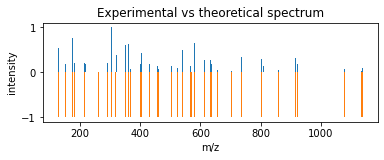

In [46]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    #plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = experiment_spectrum.get_peaks()

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)



alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
    # use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting the is_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
    # align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, experiment_spectrum)
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(experiment_spectrum[obs_idx].getMZ()))
b=str(peptide_id.getMetaValue("scan_index"))
print(a)

theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(experiment_spectrum[obs_idx].getMZ())
    obs_int.append(experiment_spectrum[obs_idx].getIntensity())
plt.subplot(2, 1, 1)
    # make range form 300 to 1000 to see the simialrity
title = 'Experimental vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)  
   

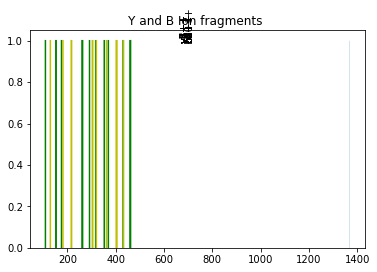

In [97]:
# make range form 300 to 1000 to see the simialrity
"""
for mz, intensity in zip(*experiment_spectrum.get_peaks()):
    if mz >= 300.0 and mz <= 1000.0:
        plt.plot([mz, mz], [0, intensity], color='red')
        plt.plot([obs_mz, obs_mz], [0, intensity], color='black')
        """
plt.title("Y and B Ion fragments ")
count = 0
idx=0
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False)
for mz, i in zip(*theo_spectrum.get_peaks()):
    if mz >= 100 and mz <= 500:
        if 'y' in theo_spectrum.getStringDataArrays()[0][count].decode():
            for rect in bars:
                height = rect.get_height()
                plt.text((rect.get_x() + rect.get_width())/2 , height, annot[idx].decode(), ha='center', rotation=90)
                plt.plot([mz, mz], [0, i], snap=False, color="y")

                idx += 1
            count = count + 1
        else:
            for rect in bars:
                height = rect.get_height()
                plt.text((rect.get_x() + rect.get_width())/2 , height, annot[idx].decode(),rotation=90)
                idx += 1
                plt.plot([mz, mz], [0, i], snap=False, color="g")

            count = count + 1

plt.ylim(bottom=0)
plt.show()
